## PREGUNTA 1 APARTADO 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

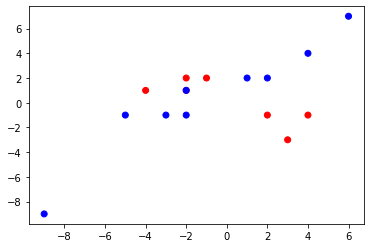

In [2]:
X = np.array([[-1,2],
              [-2,2], 
              [2,2],
              [1,2],
              [-3,-1],
              [-5,-1],
              [4,-1],
              [2,-1],
              [-2,1],
              [-4,1],
              [4,4],
              [6,7],
              [-9,-9],
              [-2,-1],
              [3,-3],
              [-2,1]
              ])
y = np.array([0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,1])


# just plot the dataset first
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier

#codi a implementar 
clf_mlp = MLPClassifier(random_state=1, max_iter=300)
clf_mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

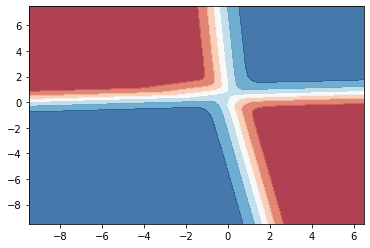

In [4]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf_mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
cm = plt.cm.RdBu
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.show()

## PREGUNTA 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

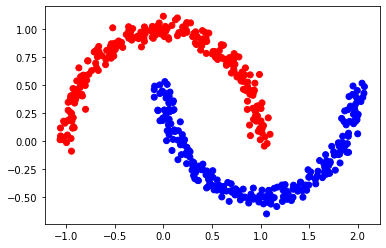

In [6]:
X, y = make_moons(noise=0.05, random_state=0, n_samples = 500)
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# just plot the dataset first
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

In [7]:
# Prepare data for training and testing
n_instances, n_features = X.shape
idx = np.random.permutation(n_instances)
percentage_training=0.8

# implement simple validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=1-percentage_training, random_state=42)

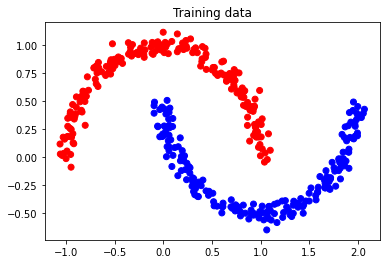

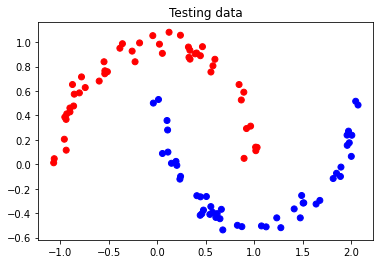

In [8]:
# Visualization of the training and testing points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.title('Training data')
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
plt.title('Testing data')
plt.show()

In [9]:
# Knearest classifier and evaluation
from sklearn.neighbors import KNeighborsClassifier

#implement kNeighbors classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
score=accuracy_score(y_test, y_pred)
print(score)

1.0


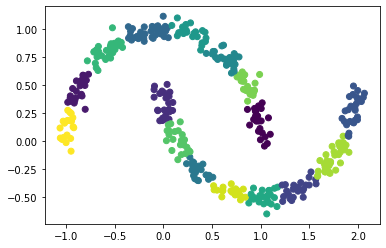

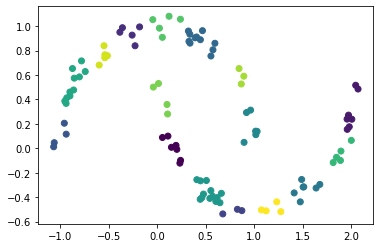

In [10]:
from sklearn.cluster import KMeans
n_clusters=16
#implement kmenas with n_clusters=16

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_train)
y_pred_train = kmeans.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train)
plt.show()

y_pred_test = kmeans.fit_predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test)
plt.show()

In [11]:
list_nclusters = [4,6,8,12,16]

In [12]:
performance = np.zeros((len(list_nclusters),))
for value, i_cluster in enumerate(list_nclusters):
    for value_nn, i_nn in enumerate([1,3]):
        # implement kmeans with icluster
        
        kmeans = KMeans(n_clusters=i_cluster, random_state=0).fit(X_train)
        y_pred_train = kmeans.fit_predict(X_train)

        X_train_kmeans = kmeans.cluster_centers_
        y_train_kmeans = np.zeros((i_cluster,))
        for idx in range(i_cluster):
            y_train_kmeans[idx] = np.median(y_train[y_pred_train==idx])

        # implement knearesclassifier using kmeans centroids and centroid labels

        neigh = KNeighborsClassifier(n_neighbors=i_nn)
        neigh.fit(X_train_kmeans, y_train_kmeans)
        y_pred = neigh.predict(X_test)
        score=accuracy_score(y_test, y_pred)
        performance[value] = score
        print('number of clusters: '+str(i_cluster)+" number nn: "+str(i_nn)+" score: "+str(score))
    
    

number of clusters: 4 number nn: 1 score: 0.88
number of clusters: 4 number nn: 3 score: 0.8
number of clusters: 6 number nn: 1 score: 0.98
number of clusters: 6 number nn: 3 score: 0.85
number of clusters: 8 number nn: 1 score: 1.0
number of clusters: 8 number nn: 3 score: 0.9
number of clusters: 12 number nn: 1 score: 1.0
number of clusters: 12 number nn: 3 score: 0.97
number of clusters: 16 number nn: 1 score: 1.0
number of clusters: 16 number nn: 3 score: 0.99
